## Import the relevant packages

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Data

In [2]:
#### tfds.load(name, with_info, as_supervised) - loads dataset from tensorflow dataset
## as_supervised = True, loads the data in 2-tuple structure(input, target
## with_info = True, provide tuple containing info about version, feature, #samples of the dataset

mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True) 
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']


##### take validation data from train dataset. the easiest way to is to take an arbitrary percentage of train dataset to serve as validation, so let's take 10% of it
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

##### we can count number of samples or use mnist_info and tf.cast(x,dtype) -> casts(converts) a variable into a given data type
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)



#### scale the data in some way to make the result more numerically stable inputs(inputs between 0 and 1)
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

##make sure all values are float so cast the image local variable to float32, 
##mnist images contains values from 0 to 255, representing 256 shades of gray i.e if we divide each element by 255 we'll get the desired result all elements between 0 and 1



## dataset.map(*function*) - applies a custom transformation to a given dataset. it takes as input a function which determines the transformation
scaled_train_and_validation_data = mnist_train.map(scale) 
test_data = mnist_test.map(scale)




## Shuffling = keeping the same information but in a different order
## when we are dealing with enormous datasets, we cant shuffle all data at once so we instruct tf to take samples of 10000 at a time shuffle them, and then take next 10000

BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)



## dataset.batch(batch_size) - a method thet combines the consecutive elements of dataset into batches
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

## when batching we find avg loss and accuracy, model expects validation dataset in batch form too

## validation data must have same shape and object properties as train and test data, the mnist data is iterable and 2-tuple so extract and convert inputs and targets

validation_inputs, validation_target = next(iter(validation_data)) 

## MODEL

#### Outline of the model

each image in mnist dataset is  28 pixel by 28 pixels, all images are of the same size a 28 x 28 = 784 pixels

the approach for deep feedforward neural netoworks is to transform or flatten each images into a vector of length 784 x 1, so for each image we have 784 inputs
there are 10 digits so 10 classes i.e. 10 output units.

In [3]:
input_size = 784
output_size = 10
hidden_layer_size = 100

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])


## choose optimizer and loss function

In [4]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Training

In [5]:
Num_epchs = 15

history  = model.fit(train_data, epochs = Num_epchs, validation_data = (validation_inputs, validation_target), verbose = 2)

Epoch 1/15
540/540 - 2s - 4ms/step - accuracy: 0.9050 - loss: 0.3396 - val_accuracy: 0.9530 - val_loss: 0.1611
Epoch 2/15
540/540 - 1s - 2ms/step - accuracy: 0.9586 - loss: 0.1382 - val_accuracy: 0.9680 - val_loss: 0.1091
Epoch 3/15
540/540 - 1s - 2ms/step - accuracy: 0.9712 - loss: 0.0970 - val_accuracy: 0.9728 - val_loss: 0.0889
Epoch 4/15
540/540 - 1s - 2ms/step - accuracy: 0.9769 - loss: 0.0750 - val_accuracy: 0.9798 - val_loss: 0.0715
Epoch 5/15
540/540 - 1s - 2ms/step - accuracy: 0.9815 - loss: 0.0611 - val_accuracy: 0.9817 - val_loss: 0.0589
Epoch 6/15
540/540 - 1s - 2ms/step - accuracy: 0.9849 - loss: 0.0501 - val_accuracy: 0.9842 - val_loss: 0.0496
Epoch 7/15
540/540 - 1s - 2ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9867 - val_loss: 0.0414
Epoch 8/15
540/540 - 1s - 2ms/step - accuracy: 0.9896 - loss: 0.0339 - val_accuracy: 0.9867 - val_loss: 0.0357
Epoch 9/15
540/540 - 1s - 2ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9903 - val_loss: 0.0353
E

## Test_model

In [6]:
test_loss, test_accuracy  = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test Accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9780 - loss: 0.0934
Test loss: 0.09. Test Accuracy: 97.80%


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,832 (1.03 MB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,222 (700.09 KB)

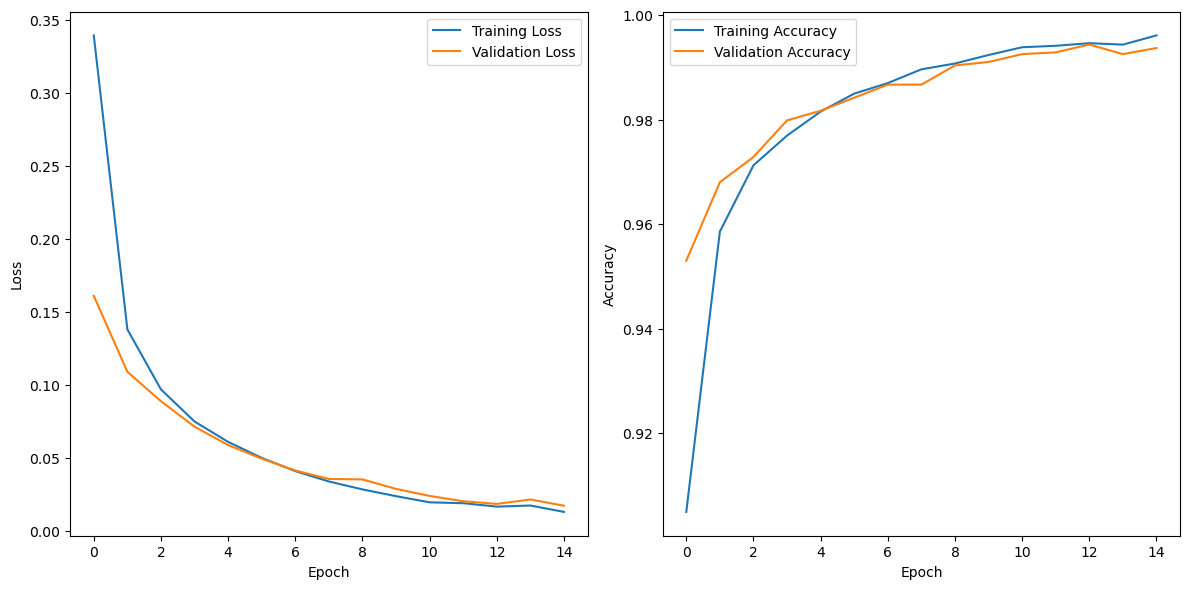

In [8]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot training and validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()
